<a href="https://colab.research.google.com/github/Qvery-mm/NumericMethods_3/blob/main/6_term_lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вычислительный практикум, 6 семестр
# Задание №5
# Применение дискретного ряда Фурье для решения методом сеток однородного уравнения теплопроводности. Спектральный признак устойчивости.

### Ковальчуков Александр
### 321 группа
### Вариант №6

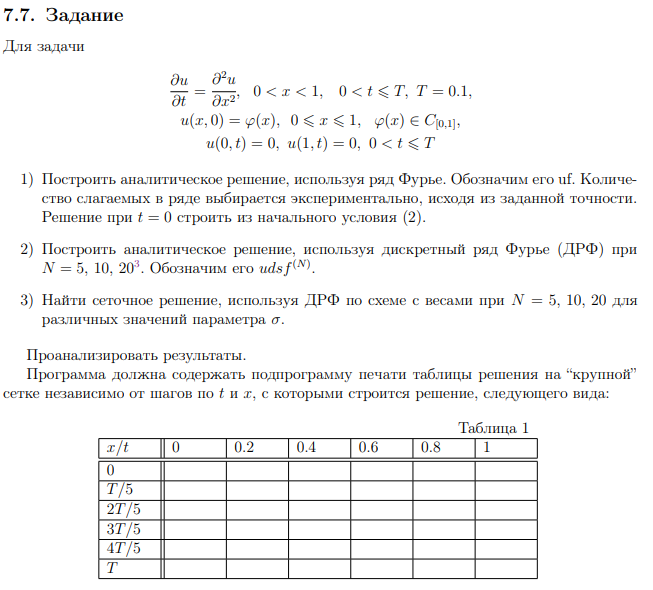

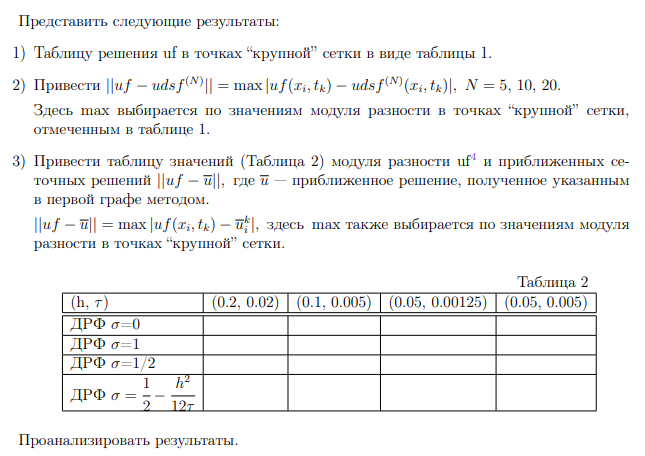

# Вариант задачи

### 6) $\varphi(x) = \sin(3 \pi x)$

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import *

# Аналитическое решение задачи

In [28]:
T = 0.1
def phi(x): return sin(3*pi*x)
c_p = 1/sqrt(2)
def uf(x, t): return sqrt(2) * c_p * exp(-pi**2 * 3**2 * t) * sin(3 * pi * x)

### Таблица решения

In [29]:
N, M = 5, 5
h, tau = 1/N, T/M
columns = list(np.linspace(0, 1, N+1))
index = list(np.linspace(0, T, M+1))
data = np.zeros((N+1, M+1))
for i in range(N+1):
  for k in range(M+1):
    data[i, k] = uf(i*h, k*tau)
df = pd.DataFrame(data.T, columns=columns, index=index)
df.columns.name = 't\\x'
df

t\x,0.0,0.2,0.4,0.6,0.8,1.0
0.00,0.0,0.951057,-0.587785,-0.587785,0.951057,3.673940e-16
0.02,0.0,0.160942,-0.099468,-0.099468,0.160942,6.217209e-17
0.04,0.0,0.027235,-0.016832,-0.016832,0.027235,1.052104e-17
0.06,0.0,0.004609,-0.002848,-0.002848,0.004609,1.780419e-18
0.08,0.0,0.000780,-0.000482,-0.000482,0.000780,3.012905e-19
0.10,0.0,0.000132,-0.000082,-0.000082,0.000132,5.098575e-20


# Решение при помощи дискретного ряда Фурье

In [30]:
for N in [5, 10, 20]:
  h = 1 / N
  over_phi = [phi(i*h) for i in range(N+1)]
  
  over_c = [sum([h * over_phi[i] * sin(p * pi * i * h) for i in range(1, N)]) for p in range(N + 1)] 

  def udsf(x, t): return sqrt(2) * sum([sqrt(2) * over_c[p] * exp(-pi**2 * p**2 * t) * sin(p * pi * x) for p in range(1, N)])

  M = 20
  tau = T / M
  norm = 0
  for i in range(N+1):
    for k in range(M+1):
      norm = max(norm, abs(uf(i*h, k*tau) - udsf(i*h, k*tau)))
  print("||uf - udsf_N|| =", norm)

||uf - udsf_N|| = 7.771561172376096e-16
||uf - udsf_N|| = 1.1657341758564144e-15
||uf - udsf_N|| = 1.887379141862766e-15


# Решение при помощи дискретного ряда Фурье с весами

In [31]:
def evaluate_at(N, M, sigma):
  h = 1 / N
  tau = T / M
  over_phi = [sqrt(2)*phi(i*h) for i in range(N+1)]
  over_c = [sum([ h * over_phi[i] * sin(p * pi * i * h) for i in range(1, N)]) for p in range(N + 1)] 
  over_lambda = [ (1-(4*(1-sigma)*tau*sin(p*pi*h/2)**2)/h**2) / (1 + (4*sigma*tau*sin(p*pi*h/2)**2)/h**2) for p in range(N+1)]
  u = np.zeros((N+1, M+1))
  for i in range(N+1):
    for k in range(M+1):
      u[i, k] = sqrt(2) * sum([over_c[p] * over_lambda[p]**k * sin(p*pi*i*h) for p in range(1, N)])
  
  norm = 0
  for i in range(1, N):
    for k in range(1, M):
      norm = max(norm, abs(uf(i*h, k*tau) - u[i, k]))
  return norm


In [32]:
data = np.zeros((4,4))
columns = [(5, 5), (10, 20), (20, 80), (20, 20)]
for x, (N, M) in enumerate(columns):
  h = 1/N
  tau = T/M
  for y, sigma in enumerate([0, 1, 0.5, 0.5 - h**2/(12*tau)]):
    if not (sigma>= 1/2 or tau <= h**2 / (2*(1 - 2*sigma))):
      print(f' Решение с (N, M, sigma) = ({N}, {M}, {sigma}) неустойчивое')
    acc = evaluate_at(N, M, sigma)
    data[y, x] = acc

 Решение с (N, M, sigma) = (20, 20, 0) неустойчивое


In [33]:
pd.DataFrame(data, columns=columns, index=["ДРФ sigma=0", "ДРФ sigma=1", "ДРФ sigma=1/2", "ДРФ sigma=1/2-h^2/(12 tau)"])

,"(5, 5)","(10, 20)","(20, 80)","(20, 20)"
ДРФ sigma=0,0.454835,0.065878,0.014199,5.426959
ДРФ sigma=1,0.250946,0.091213,0.025992,0.073879
ДРФ sigma=1/2,0.037656,0.021894,0.006455,0.000864
ДРФ sigma=1/2-h^2/(12 tau),0.076637,0.004857,0.000302,0.006066


# Выводы

Дискретный ряд Фурье может сколь угодно точно аппроксимировать решение. При этом коэффициенты Фурье выстро сходятся к нулю, поэтому для достижения наилучшей точности на ЭВМ, достаточно взять первые несколько десятков членов ряда.

Сеточные функции с весами демонстрируют порядок точности $O(h^2 + \tau^2)$, где $h, \tau$ - интервалы дробления сеточной функции. Схема вычислительно затратная, и не всегда устойчивая. 